In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("../../data/student-survey.txt", sep="\t")

# Display the first few rows of the data
data.head()


,Gender,Do.you.believe.in.God,Pick.Random.Number,Height,Hand,Dates,FB.Friends,Weight,Drinks,Varsity,Songs,Diet,Politics.9Cat,Politics.numeric,Politics.3Cat
0,Female,Not sure,6,71.0,Predominantly Left Handed,1.0,314.0,138.0,0,Yes,1564.0,Omnivore,2. Very Liberal,2.0,Liberal
1,Male,No,2,66.0,Predominantly Right Handed,2.0,1228.0,130.0,0,No,97.0,Vegetarian,2. Very Liberal,2.0,Liberal
2,Male,Yes,9,73.0,Predominantly Right Handed,1.0,1189.0,183.0,0,Yes,1397.0,Carnivore,7. Moderatly Conservative,7.0,Conservative
3,Female,No,6,67.0,Predominantly Right Handed,1.0,0.0,125.0,0,No,2241.0,Omnivore,3. Moderately Liberal,3.0,Liberal
4,Male,Yes,7,71.0,Predominantly Right Handed,0.0,709.0,245.0,0,No,1299.0,Omnivore,5. Independent/Middle of Road,5.0,Moderate


In [26]:
# # Are men or women more left wing?
data.groupby("Gender")["Politics.numeric"].mean()

# # Have men or women had more dates?
# data.groupby("Gender")["Dates"].mean()



Gender
Female    3.615385
Male      4.204420
Name: Politics.numeric, dtype: float64

## How does gender affect political leaning?

We see that women are more left wing than men. With a mean of 3.6 and 4.2 for women and men respectively.





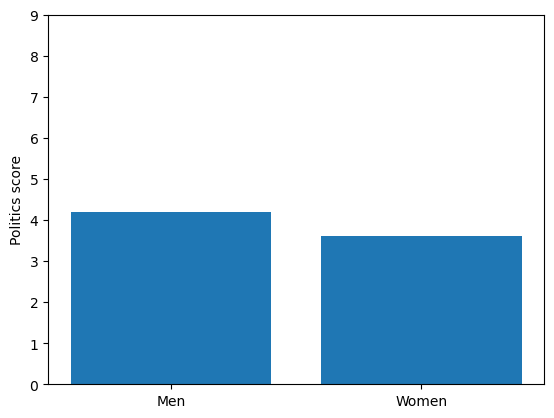

In [27]:
# Plot men and women political data
men_politics = data[data["Gender"] == "Male"]["Politics.numeric"]
women_politics = data[data["Gender"] == "Female"]["Politics.numeric"]

plt.bar(["Men", "Women"], [men_politics.mean(), women_politics.mean()])
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.ylabel("Politics score")
plt.show()




## Facebook friends summary

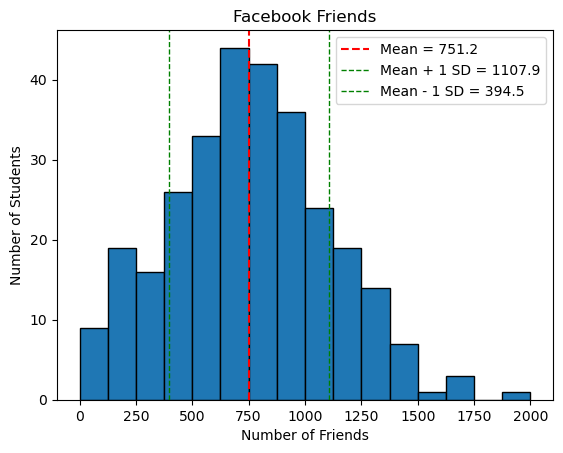

In [28]:
# histogram of facebook friends
import numpy as np


# Calculate mean and standard deviation
mean = np.mean(friends)
std = np.std(friends)

friends = data["FB.Friends"]
plt.hist(friends, bins=16, edgecolor="black")
plt.title("Facebook Friends")
plt.xlabel("Number of Friends")
plt.ylabel("Number of Students")

# Add vertical lines for mean and std dev
plt.axvline(mean, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean = {mean:.1f}")
plt.axvline(mean + std, color="green", linestyle="dashed", linewidth=1, label=f"Mean + 1 SD = {mean + std:.1f}")
plt.axvline(mean - std, color="green", linestyle="dashed", linewidth=1, label=f"Mean - 1 SD = {mean - std:.1f}")
plt.legend()
plt.show()


## KDE smooth distribution comparison male and female facebook friends

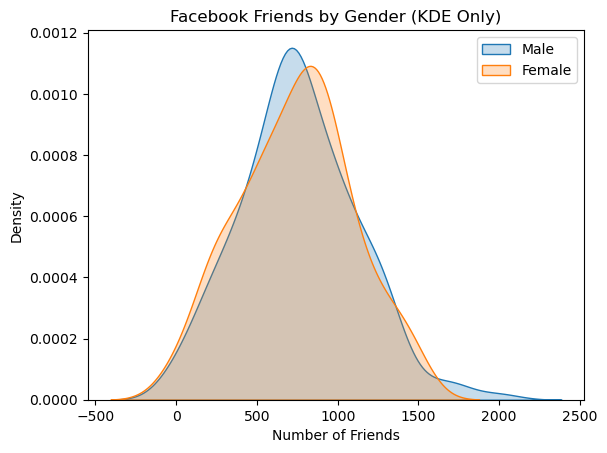

In [31]:
import seaborn as sns
# import matplotlib.pyplot as plt

# Filter out male and female data
male_friends = data[data["Gender"] == "Male"]["FB.Friends"]
female_friends = data[data["Gender"] == "Female"]["FB.Friends"]

# Plot KDEs
sns.kdeplot(male_friends, label="Male", fill=True)
sns.kdeplot(female_friends, label="Female", fill=True)

# Add title and labels
plt.title("Facebook Friends by Gender (KDE Only)")
plt.xlabel("Number of Friends")
plt.ylabel("Density")
plt.legend()

plt.show()


In [38]:
male_friends_mean = np.mean(male_friends)
female_friends_mean = np.mean(female_friends)

print("Male friends mean:", male_friends_mean)
print("Female friends mean:", female_friends_mean)

male_friends_median = male_friends.median()
female_friends_median = female_friends.median()

print("Male friends median:", male_friends_median)
print("Female friends median:", female_friends_median)

male_friends_mode = male_friends.mode()
female_friends_mode = female_friends.mode()

print("Male friends mode:", male_friends_mode)
print("Female friends mode:", female_friends_mode)




Male friends mean: 758.5224719101124
Female friends mean: 739.8706896551724
Male friends median: 730.0
Female friends median: 773.0
Male friends mode: 0    500.0
Name: FB.Friends, dtype: float64
Female friends mode: 0       0.0
1     200.0
2    1000.0
Name: FB.Friends, dtype: float64


Interestingly, the mean number of friends for males (758.5) is slightly higher than for females (739.9).
Despite, when looking at the KDEs, the female mode appears higher. 